<h1 style="font-size: 30px; color:turquoise;">Convolutional Autoencoder (CAE) on the CIFAR10-Dataset using Tensorflow</h1>
<h2 style="font-size: 20px;">Authors: Bruno Figura & Daniel Labuda, ML II Projektarbeit Gruppe 2, SoSe24</h2>
-----------------------------------------------------------------------------------------------------


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

from keras.datasets import cifar10
import tensorflow as tf
from keras.models import Model
from keras import layers, models, Input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

Training data shape:
 (50000, 32, 32, 3) 

Test data shape:
 (10000, 32, 32, 3) 

Training labels shape:
 (50000, 10) 

Test labels shape:
 (10000, 10)


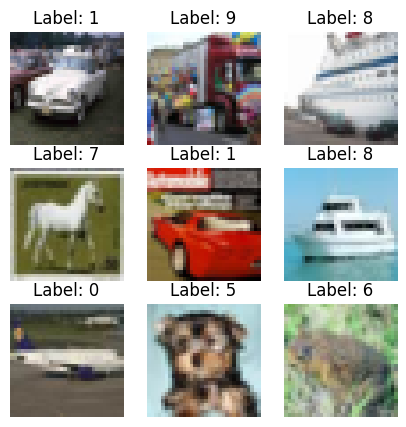

In [17]:
# Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
print("Training labels shape:\n", train_labels.shape, "\n")
print("Test labels shape:\n", test_labels.shape)

random_indices = np.random.choice(train_data.shape[0], 9, replace=False)
random_images = train_data[random_indices]

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Label: {np.argmax(train_labels[random_indices[i]])}")
    plt.axis('off')
plt.show()

In [18]:
# Define the CNN-Autoencoder (CAE) model
input_img = Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(x)
encoded = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (5, 5), padding='same', activation='sigmoid')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Classifier on top of Encoder
x = layers.Flatten()(encoded)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

# Full model including classifier
full_model = Model(input_img, output)

autoencoder.summary()
full_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 4)      │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 16)       │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 4)      │         1,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_13 (UpSampling2D) │ (None, 32, 32, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 3)      │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,243 (40.01 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 4)      │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 703,690 (2.68 MB)

 Trainable params: 701,770 (2.68 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [19]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_data, train_data, batch_size=128, epochs=200, validation_data=(test_data, test_data))

# Compile and train the full model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
full_model.fit(train_data, train_labels, batch_size=128, epochs=200, validation_data=(test_data, test_labels))

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.6208 - val_loss: 0.5789
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.5773 - val_loss: 0.5738
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.5717 - val_loss: 0.5711
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.5691 - val_loss: 0.5688
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.5678 - val_loss: 0.5685
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.5665 - val_loss: 0.5669
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.5662 - val_loss: 0.5664
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.5659 - val_loss: 0.5662
Epoch 9/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.5653 - val_loss: 0.5658
Epoch 10/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.5646 - val_loss: 0.5650
Epoch 11/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.5645 - val_loss: 0.5653
Epoch 12/200
391/391 ━━━━━━━━

In [ ]:
# Plot 5 random input-images to be ran through the CAE as well as the results
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Get the restored images from the autoencoder
restored_imgs = autoencoder.predict(test_data)

# Create a 2x5 grid for displaying results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title('Restored')

plt.show()

# Display classification results
predictions = full_model.predict(test_data)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Classification results: Original and Predicted Labels')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original: {np.argmax(test_labels[random_index])}')

    # Predicted labels
    axes[1, i].imshow(test_data[random_index])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Predicted: {np.argmax(predictions[random_index])}')

plt.show()

In [ ]:
# Predict the labels for the test data
predicted_labels = np.argmax(full_model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(true_labels, predicted_labels, digits=3)
print('Classification Report:\n', report)